In [47]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Creating classes to store all folders of images as list

In [48]:
classes=[]
for c in os.listdir('C:\\Users\\HP\\Downloads\\Photos_train'):
    classes.append(c)


Training Data

In [49]:
features = []
labels=[]

def create_train():    
    for category in classes:
        path = os.path.join('C:\\Users\\HP\\Downloads\\Photos_train',category)
        label = classes.index(category)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)

            haar_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

            face_rect = haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)

            for (x,y,w,h) in face_rect:
                face_roi = gray[y:y+h,x:x+w]
                labels.append(label)
                features.append(face_roi)


create_train()

Converting labels,features into array

In [50]:
labels = np.array(labels)
features = np.array(features,dtype='object')

Using face recognizer model

In [51]:
face_recog = cv.face.LBPHFaceRecognizer_create()
face_recog.train(features,labels)

In [52]:
face_recog.save('my_model.yml')

Load the test image

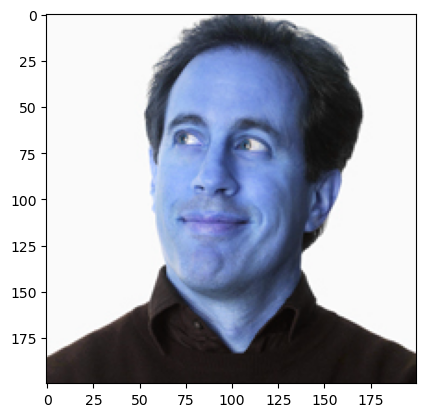

In [53]:
img_test = cv.imread("C:\\Users\\HP\\Downloads\\Photos_train\\jerry_seinfeld\\httpswwwticketscomuploadsartistsjerryseinfeldbilletsjpg.jpg")
plt.imshow(img_test)

In [54]:
gray_test= cv.cvtColor(img_test,cv.COLOR_BGR2GRAY)
face_rect_test = haar_cascade.detectMultiScale(gray,1.1,3)
for (x,y,w,h) in face_rect_test:
    face_roi = gray_test[y:y+h,x:x+w]

Prediction

In [55]:
labels,confidence = face_recog.predict(face_roi)
labels
print(classes[labels])

jerry_seinfeld
